In [1]:
import os
import pickle
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tf_util as U

In [2]:
#Exp9   actionp_penalty= 0.1
with open('penalty/Seaquest_exp_9_rewards.pkl','rb') as f:
    rewards_01 = pickle.load(f)
#Exp10  actionp_penalty= 0.01
with open('penalty/Seaquest_exp_10_rewards.pkl','rb') as f:
    rewards_001 = pickle.load(f)
#Exp11  actionp_penalty= 0.001
with open('penalty/Seaquest_exp_11_rewards.pkl','rb') as f:
    rewards_0001 = pickle.load(f)
#Exp12  actionp_penalty= 0
with open('penalty/Seaquest_exp_12_rewards.pkl','rb') as f:
    rewards_0 = pickle.load(f)

# Resultados são  ruidosos

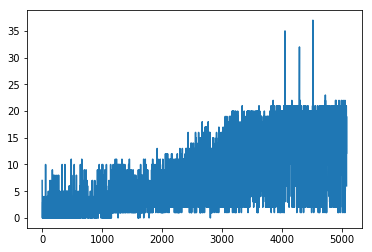

In [3]:
plt.plot(rewards_0)

# Usando o Maximo de uma janela de n episódios

In [30]:
a = np.array([1,2,2,2,3,8,3,5,6])
print(np.mean(a))
print(np.max(a))
print(np.min(a))
print(np.median(a))

3.55555555556
8
1
3.0


In [31]:
def maxi(array, window=2):
    n = window
    l = len(array)
    return [np.max(array[i:i+n]) for i in range(l-n+1)]

def mini(array, window=2):
    n = window
    l = len(array)
    return [np.min(array[i:i+n]) for i in range(l-n+1)]


def median(array, window=2):
    n = window
    l = len(array)
    return [np.median(array[i:i+n]) for i in range(l-n+1)]

def mean(array, window=2):
    n = window
    l = len(array)
    return [np.mean(array[i:i+n]) for i in range(l-n+1)]

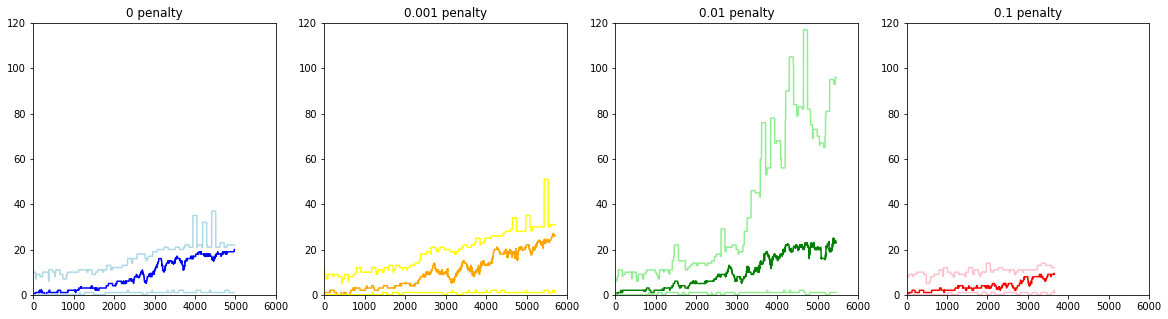

In [54]:
win = 100

plt.figure(1,figsize=(20,5))

plt.subplot(141)
plt.plot(maxi(rewards_0,window=win),color='lightblue')
plt.plot(median(rewards_0,window=win),color='blue')
plt.plot(mini(rewards_0,window=win),color='lightblue')
plt.axis([0,6000,0,120])
plt.title('0 penalty')
plt.subplot(142)
plt.plot(maxi(rewards_0001,window=win), color='yellow')
plt.plot(median(rewards_0001,window=win), color='orange')
plt.plot(mini(rewards_0001,window=win), color='yellow')
plt.axis([0,6000,0,120])
plt.title('0.001 penalty')
plt.subplot(143)
plt.plot(maxi(rewards_001,window=win), color='lightgreen')
plt.plot(median(rewards_001,window=win), color='green')
plt.plot(mini(rewards_001,window=win), color='lightgreen')
plt.axis([0,6000,0,120])
plt.title('0.01 penalty')
plt.subplot(144)
plt.plot(maxi(rewards_01,window=win), color='pink')
plt.plot(median(rewards_01,window=win), color='red')
plt.plot(mini(rewards_01,window=win), color='pink')
plt.axis([0,6000,0,120])
plt.title('0.1 penalty')

# Treinando por 24h

In [12]:
files = [file for file in os.listdir('penalty/') if 'penalty' in file]
files

['Seaquest_penalty0_10Msteps_rewards.pkl',
 'Seaquest_penalty01_10Msteps_rewards.pkl',
 'Seaquest_penalty0001_10Msteps_rewards.pkl',
 'Seaquest_penalty002_10Msteps_rewards.pkl',
 'Seaquest_penalty0005_10Msteps_rewards.pkl',
 'Seaquest_penalty001_10Msteps_rewards.pkl']

In [13]:
reward_records = []
for file_name in files:
    with open('penalty/'+file_name,'rb') as f:
        rewards = pickle.load(f)
    reward_records.append(rewards)
len(reward_records)

6

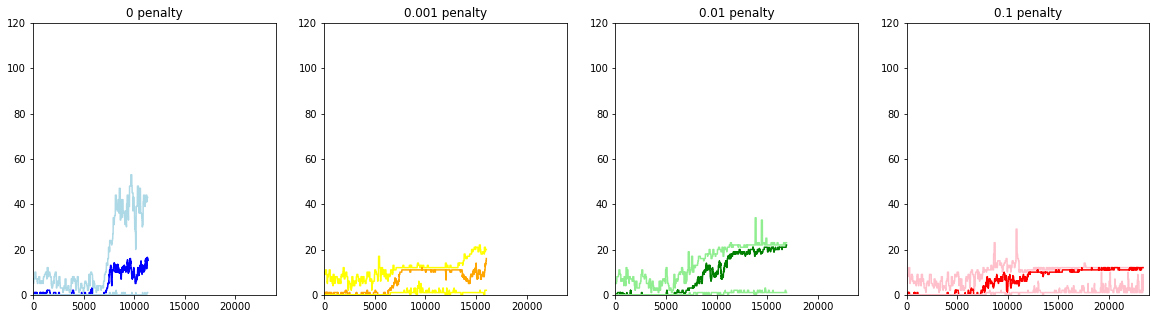

In [55]:
win = 100
max_episodes = 24000
max_points = 120

plt.figure(1,figsize=(20,5))
plt.subplot(141)
plt.plot(maxi(reward_records[0],window=win),color='lightblue')
plt.plot(median(reward_records[0],window=win),color='blue')
plt.plot(mini(reward_records[0],window=win),color='lightblue')
plt.axis([0,max_episodes,0,max_points])
plt.title('0 penalty')
plt.subplot(142)
plt.plot(maxi(reward_records[2],window=win), color='yellow')
plt.plot(median(reward_records[2],window=win), color='orange')
plt.plot(mini(reward_records[2],window=win), color='yellow')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.001 penalty')
plt.subplot(143)
plt.plot(maxi(reward_records[5],window=win), color='lightgreen')
plt.plot(median(reward_records[5],window=win), color='green')
plt.plot(mini(reward_records[5],window=win), color='lightgreen')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.01 penalty')
plt.subplot(144)
plt.plot(maxi(reward_records[1],window=win), color='pink')
plt.plot(median(reward_records[1],window=win), color='red')
plt.plot(mini(reward_records[1],window=win), color='pink')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.1 penalty')

## Valores em torno de 0.01

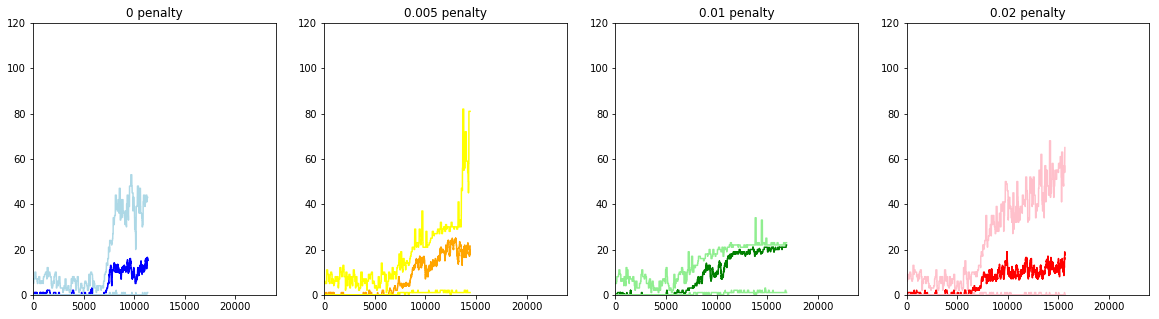

In [56]:
win = 100
max_episodes = 24000
max_points = 120

plt.figure(1,figsize=(20,5))
plt.subplot(141)
plt.plot(maxi(reward_records[0],window=win), color='lightblue')
plt.plot(median(reward_records[0],window=win), color='blue')
plt.plot(mini(reward_records[0],window=win), color='lightblue')
plt.axis([0,max_episodes,0,max_points])
plt.title('0 penalty')
plt.subplot(142)
plt.plot(maxi(reward_records[4],window=win), color='yellow')
plt.plot(median(reward_records[4],window=win), color='orange')
plt.plot(mini(reward_records[4],window=win), color='yellow')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.005 penalty')
plt.subplot(143)
plt.plot(maxi(reward_records[5],window=win), color='lightgreen')
plt.plot(median(reward_records[5],window=win), color='green')
plt.plot(mini(reward_records[5],window=win), color='lightgreen')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.01 penalty')
plt.subplot(144)
plt.plot(maxi(reward_records[3],window=win), color='pink')
plt.plot(median(reward_records[3],window=win), color='red')
plt.plot(mini(reward_records[3],window=win), color='pink')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.02 penalty')

# Efeito do tamanho da janela

Window size 7


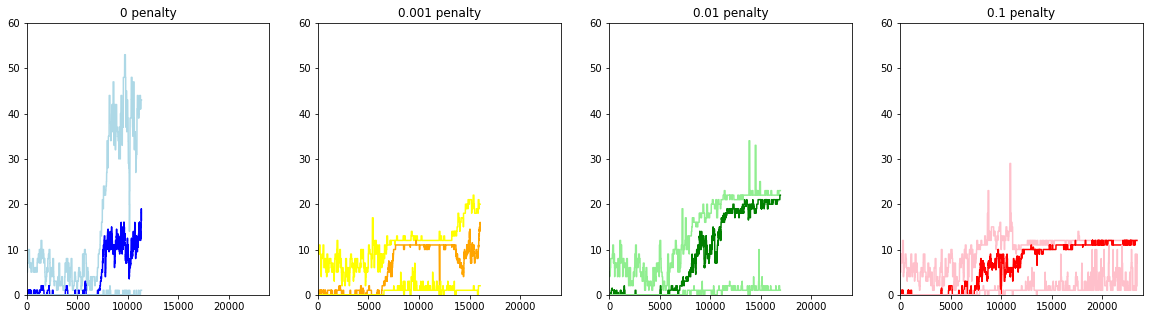

Window size 10


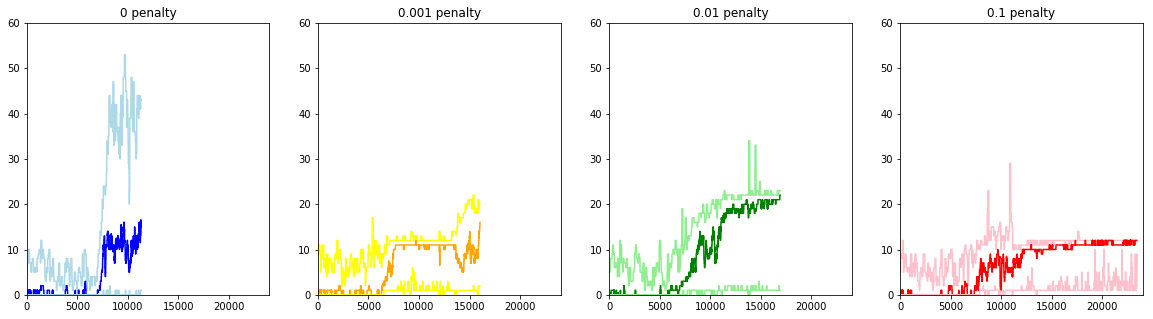

Window size 13


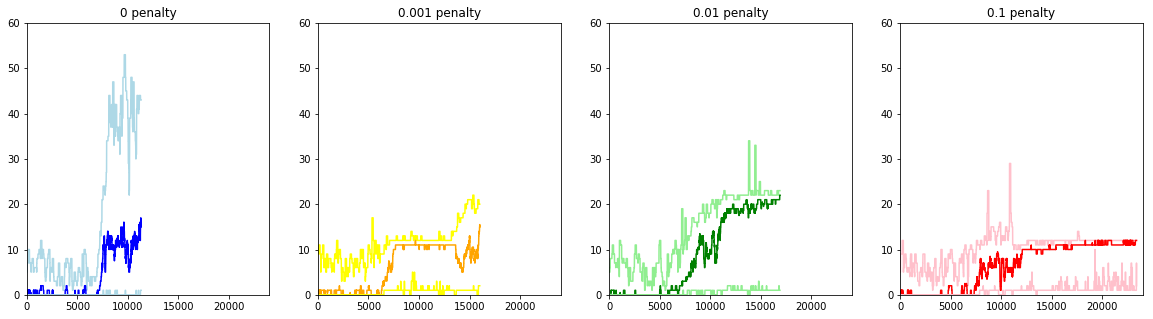

In [57]:
max_episodes = 24000
max_points = 60

print('Window size 7')
win = 80

plt.figure(1,figsize=(20,5))
plt.subplot(141)
plt.plot(maxi(reward_records[0],window=win),color='lightblue')
plt.plot(median(reward_records[0],window=win),color='blue')
plt.plot(mini(reward_records[0],window=win),color='lightblue')
plt.axis([0,max_episodes,0,max_points])
plt.title('0 penalty')
plt.subplot(142)
plt.plot(maxi(reward_records[2],window=win), color='yellow')
plt.plot(median(reward_records[2],window=win), color='orange')
plt.plot(mini(reward_records[2],window=win), color='yellow')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.001 penalty')
plt.subplot(143)
plt.plot(maxi(reward_records[5],window=win), color='lightgreen')
plt.plot(median(reward_records[5],window=win), color='green')
plt.plot(mini(reward_records[5],window=win), color='lightgreen')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.01 penalty')
plt.subplot(144)
plt.plot(maxi(reward_records[1],window=win), color='pink')
plt.plot(median(reward_records[1],window=win), color='red')
plt.plot(mini(reward_records[1],window=win), color='pink')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.1 penalty')
plt.show()

print('Window size 10')
win = 100

plt.figure(2,figsize=(20,5))
plt.subplot(141)
plt.plot(maxi(reward_records[0],window=win),color='lightblue')
plt.plot(median(reward_records[0],window=win),color='blue')
plt.plot(mini(reward_records[0],window=win),color='lightblue')
plt.axis([0,max_episodes,0,max_points])
plt.title('0 penalty')
plt.subplot(142)
plt.plot(maxi(reward_records[2],window=win), color='yellow')
plt.plot(median(reward_records[2],window=win), color='orange')
plt.plot(mini(reward_records[2],window=win), color='yellow')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.001 penalty')
plt.subplot(143)
plt.plot(maxi(reward_records[5],window=win), color='lightgreen')
plt.plot(median(reward_records[5],window=win), color='green')
plt.plot(mini(reward_records[5],window=win), color='lightgreen')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.01 penalty')
plt.subplot(144)
plt.plot(maxi(reward_records[1],window=win), color='pink')
plt.plot(median(reward_records[1],window=win), color='red')
plt.plot(mini(reward_records[1],window=win), color='pink')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.1 penalty')
plt.show()

print('Window size 13')
win = 120

plt.figure(3,figsize=(20,5))
plt.subplot(141)
plt.plot(maxi(reward_records[0],window=win),color='lightblue')
plt.plot(median(reward_records[0],window=win),color='blue')
plt.plot(mini(reward_records[0],window=win),color='lightblue')
plt.axis([0,max_episodes,0,max_points])
plt.title('0 penalty')
plt.subplot(142)
plt.plot(maxi(reward_records[2],window=win), color='yellow')
plt.plot(median(reward_records[2],window=win), color='orange')
plt.plot(mini(reward_records[2],window=win), color='yellow')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.001 penalty')
plt.subplot(143)
plt.plot(maxi(reward_records[5],window=win), color='lightgreen')
plt.plot(median(reward_records[5],window=win), color='green')
plt.plot(mini(reward_records[5],window=win), color='lightgreen')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.01 penalty')
plt.subplot(144)
plt.plot(maxi(reward_records[1],window=win), color='pink')
plt.plot(median(reward_records[1],window=win), color='red')
plt.plot(mini(reward_records[1],window=win), color='pink')
plt.axis([0,max_episodes,0,max_points])
plt.title('0.1 penalty')
plt.show()

In [81]:
import re

hosts = """
Host kanagawa
    User glazari
    Port 4000

Host home
    HostName 177.68.186.226
    User glazari
    Port 4000

Host recod
    HostName ssh.recod.ic.unicamp.br
    User gcombo

Host dl-02
    ProxyCommand ssh -q recod nc -q0 dl-02 22
    User gcombo
"""
lookfor =r"Host home\n    HostName (.*)"

re.findall(lookfor,hosts)


['177.68.186.226']